** Importing the necessary packages

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import dataframe_image as dfi
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import statsmodels.api as sm

** Importing the spotify csv file to pandas data frame

In [4]:
df = pd.read_csv("SpotifyFeatures.csv")

** Exploring the features of the data set

In [109]:
df .head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [99]:
df.shape

(232725, 18)

In [219]:
df.describe()


popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

<b>Checking for any missing values</b>

In [6]:
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

 There is no missing values in the data frame

In [5]:
corr = df.corr()

In [8]:
corr["popularity"].sort_values(ascending=False)

popularity          1.000000
loudness            0.363011
danceability        0.256564
energy              0.248922
tempo               0.081039
valence             0.060076
duration_ms         0.002348
speechiness        -0.151076
liveness           -0.167995
instrumentalness   -0.210983
acousticness       -0.381295
Name: popularity, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [9]:
df.shape

(232725, 18)

  **https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/(to know more about the features please visit the website)

## Exploratory Data Analysis

  <b>Checking the correlation between different features with the help of a heat map</b>

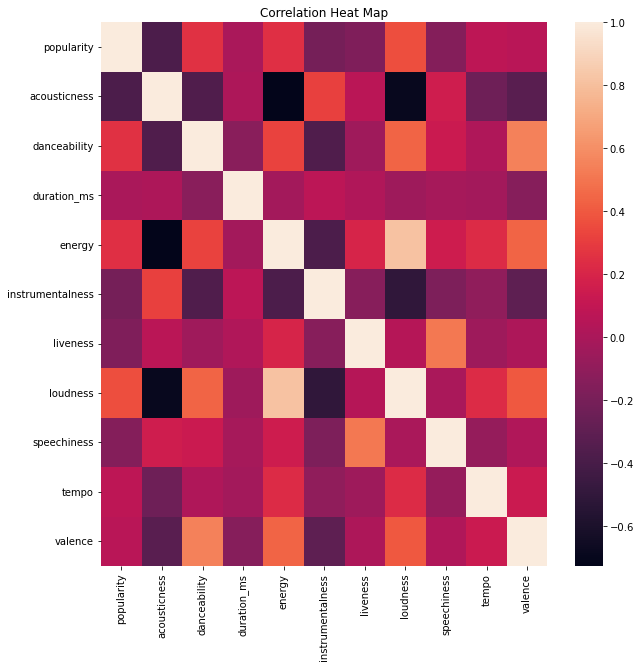

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='rocket', annot=False)
plt.title("Correlation Heat Map")
plt.savefig("heatmap.png")
plt.show()

Checking the popularity distribution in the data frame

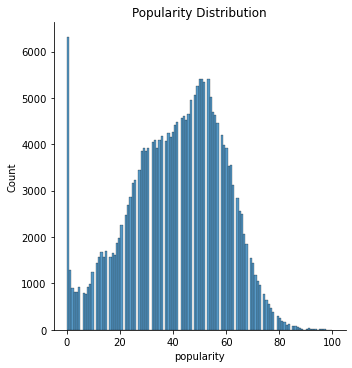

In [11]:
sns.displot(df['popularity'])
plt.title('Popularity Distribution')
plt.savefig("pop_dist.png")
plt.show()

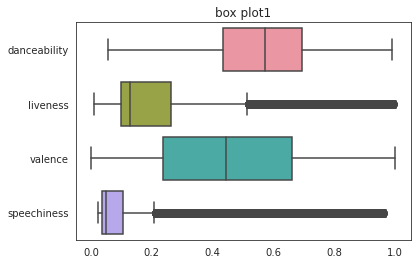

In [227]:
sns.boxplot(data=df[["danceability", "liveness", "valence","speechiness"]], orient="h")
plt.title("box plot1")
plt.savefig("full.png")

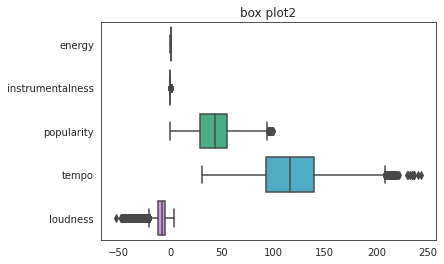

In [229]:
sns.boxplot(data=df[["energy","instrumentalness","popularity","tempo","loudness"]], orient="h")
plt.title("box plot2")
plt.savefig("full1.png")

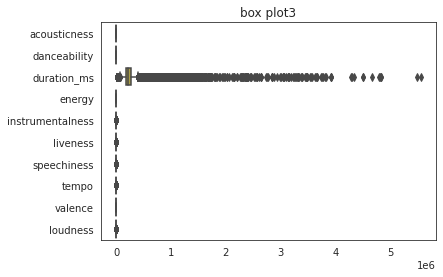

In [230]:
sns.boxplot(data=df[features], orient="h")
plt.title("box plot3")
plt.savefig("full3.png")

Text(0.5, 0, 'Popularity')

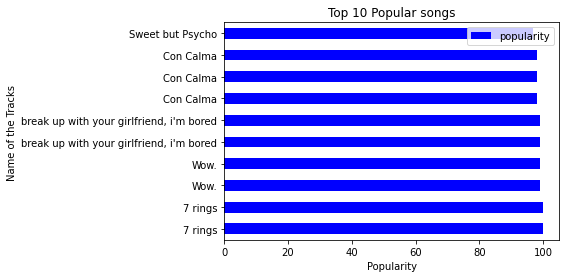

In [14]:
#to find the top 10 popular songs
dff= df.sort_values(by=['popularity'], ascending=False).head(10)
dff.nlargest(n=10, columns=['popularity'])
dff.plot.barh(x='track_name', y='popularity', color='blue', fill = True)
plt.title('Top 10 Popular songs')
plt.ylabel('Name of the Tracks ')
plt.xlabel('Popularity')

In [15]:
genre_popularity = df[['genre','track_id', 'popularity']]
genre_count = df.groupby('genre')[['popularity']].count().sort_values(by='popularity', ascending=True)
genre_sum = df.groupby('genre')[['popularity']].sum().sort_values(by='popularity', ascending=True)

genre_rank = genre_sum.popularity / genre_count.popularity
genre_rank = genre_rank.sort_values(ascending=True)
genre_rank = pd.DataFrame(genre_rank).reset_index()

print(genre_rank)

               genre  popularity
0   Children's Music    4.252637
1          A Capella    9.302521
2              Movie   12.174097
3              Opera   13.335628
4             Comedy   21.342630
5              Anime   24.258729
6                Ska   28.612351
7          Classical   29.282195
8         Soundtrack   33.954800
9              Blues   34.742879
10             World   35.524077
11            Reggae   35.589328
12         Reggaeton   37.742915
13        Electronic   38.056095
14              Jazz   40.824383
15           Country   46.100416
16              Soul   47.027836
17              Folk   49.940209
18       Alternative   50.213430
19               R&B   52.308719
20  Children’s Music   54.659040
21             Indie   54.701561
22             Dance   57.275256
23           Hip-Hop   58.423131
24              Rock   59.619392
25               Rap   60.533795
26               Pop   66.590667


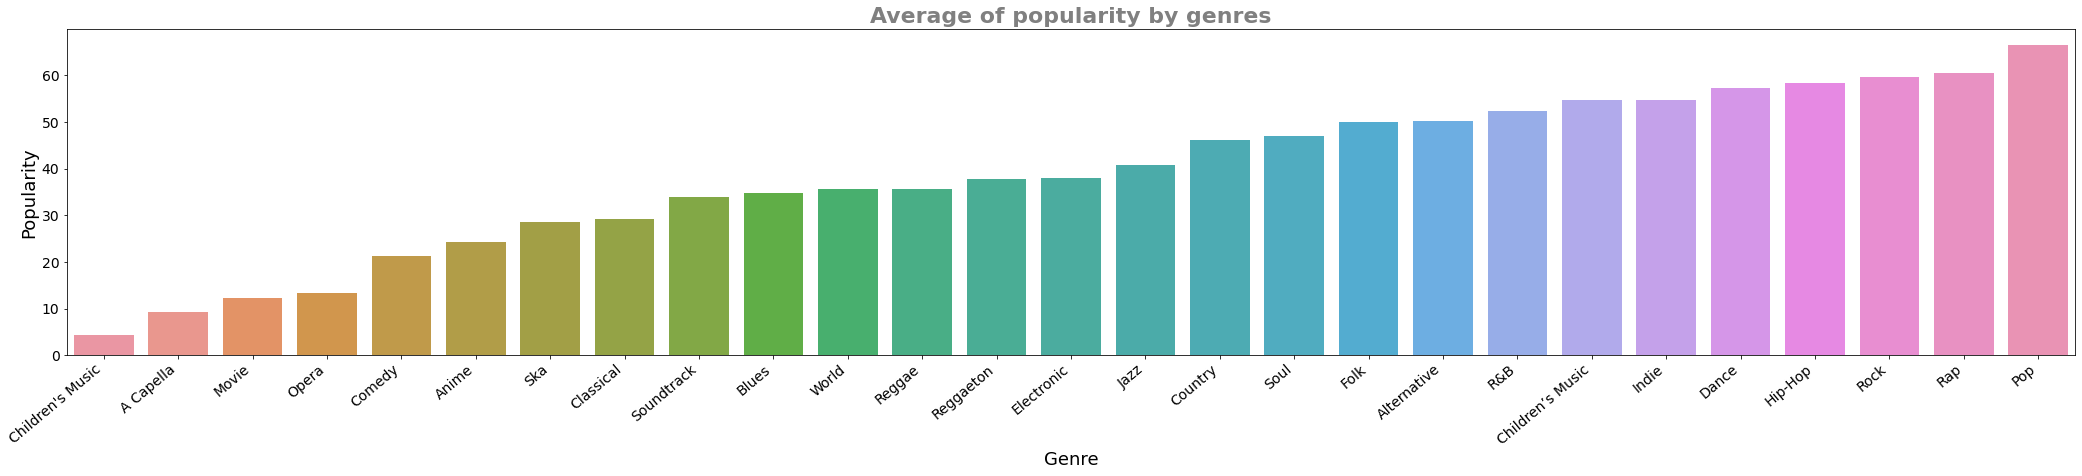

In [16]:
# Bar Chart by category and popularity
plt.figure(figsize = (36, 6))
sns.barplot(x='genre', y='popularity', data=genre_rank)

plt.xticks(fontsize=14, rotation=40,ha="right")
plt.yticks(fontsize=14)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
plt.title('Average of popularity by genres', fontweight='bold', fontsize=22, color='grey')
plt.savefig("barchart1.png")
plt.show()

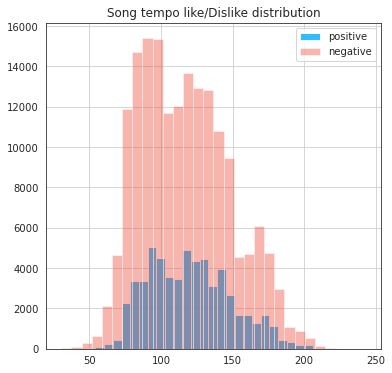

In [274]:
like_tempo = df[df["popularity"] >= 55]["tempo"]
unlike_tempo = df[df["popularity"] < 55 ]["tempo"]
red_blue= ["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
fig =plt.figure(figsize =(6,6))
plt.title("Song tempo like/Dislike distribution")
like_tempo.hist(alpha=0.9,bins=30,label="positive")
unlike_tempo.hist(alpha=0.4,bins=30,label="negative")
plt.legend(loc= "upper right")
plt.savefig('seabornPandas11.png', dpi=100)



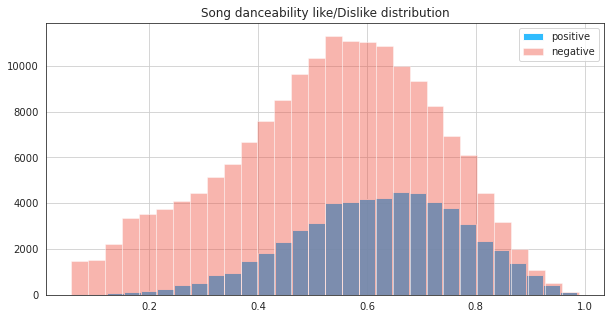

In [18]:
like_danceability = df[df["popularity"] >= 55]["danceability"]
unlike_danceability = df[df["popularity"] < 55 ]["danceability"]
red_blue= ["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
fig =plt.figure(figsize =(10,5))
plt.title("Song danceability like/Dislike distribution")
like_danceability.hist(alpha=0.9,bins=30,label="positive")
unlike_danceability.hist(alpha=0.4,bins=30,label="negative")
plt.savefig('seabornPandas13.png', dpi=100)
plt.legend(loc= "upper right")


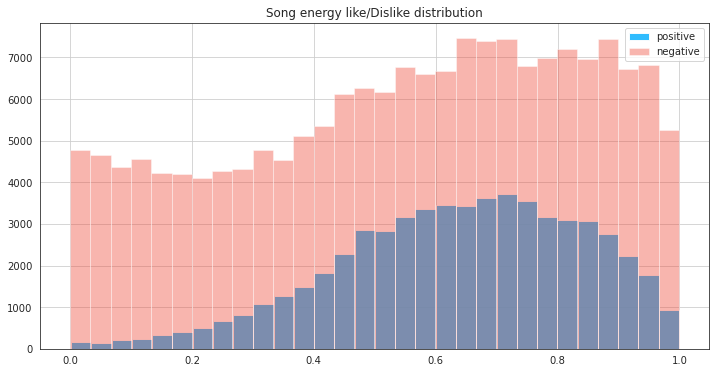

In [19]:
like_energy = df[df["popularity"] >= 55]["energy"]
unlike_energy = df[df["popularity"] < 55 ]["energy"]
red_blue= ["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
fig =plt.figure(figsize =(12,6))
plt.title("Song energy like/Dislike distribution")
like_energy.hist(alpha=0.9,bins=30,label="positive")
unlike_energy.hist(alpha=0.4,bins=30,label="negative")
plt.savefig('seabornPandas12.png', dpi=100)
plt.legend(loc= "upper right")


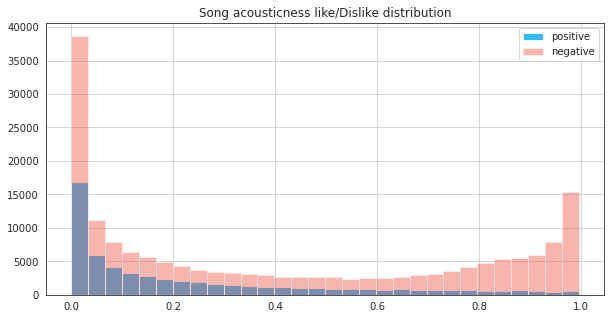

In [20]:
like_acousticness = df[df["popularity"] >= 55]["acousticness"]
unlike_acousticness = df[df["popularity"] < 55 ]["acousticness"]
red_blue= ["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
fig =plt.figure(figsize =(10,5))
plt.title("Song acousticness like/Dislike distribution")
like_acousticness.hist(alpha=0.9,bins=30,label="positive")
unlike_acousticness.hist(alpha=0.4,bins=30,label="negative")
plt.savefig('seabornPandas13.png', dpi=100)
plt.legend(loc= "upper right")

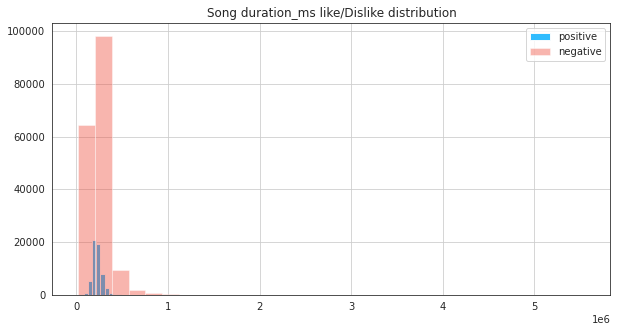

In [21]:
like_duration_ms = df[df["popularity"] >= 55]["duration_ms"]
unlike_duration_ms = df[df["popularity"] < 55 ]["duration_ms"]
red_blue= ["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
fig =plt.figure(figsize =(10,5))
plt.title("Song duration_ms like/Dislike distribution")
like_duration_ms.hist(alpha=0.9,bins=30,label="positive")
unlike_duration_ms.hist(alpha=0.4,bins=30,label="negative")
plt.savefig('seabornPandas14.png', dpi=100)
plt.legend(loc= "upper right")

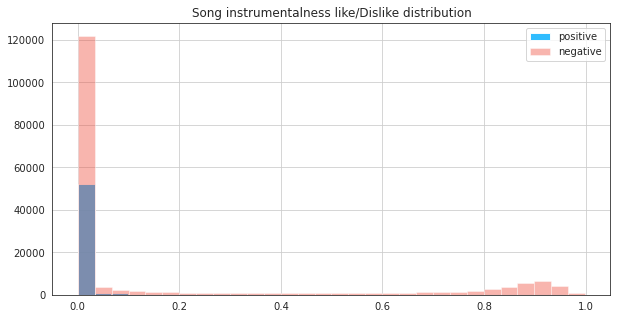

In [22]:
like_instrumentalness = df[df["popularity"] >= 55]["instrumentalness"]
unlike_instrumentalness = df[df["popularity"] < 55 ]["instrumentalness"]
red_blue= ["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
fig =plt.figure(figsize =(10,5))
plt.title("Song instrumentalness like/Dislike distribution")
like_instrumentalness.hist(alpha=0.9,bins=30,label="positive")
unlike_instrumentalness.hist(alpha=0.4,bins=30,label="negative")
plt.savefig('seabornPandas15.png', dpi=100)
plt.legend(loc= "upper right")

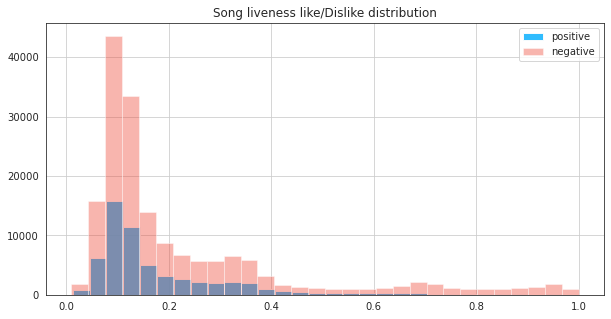

In [23]:
like_liveness = df[df["popularity"] >= 55]["liveness"]
unlike_liveness = df[df["popularity"] < 55 ]["liveness"]
red_blue= ["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
fig =plt.figure(figsize =(10,5))
plt.title("Song liveness like/Dislike distribution")
like_liveness.hist(alpha=0.9,bins=30,label="positive")
unlike_liveness.hist(alpha=0.4,bins=30,label="negative")
plt.savefig('seabornPandas16.png', dpi=100)
plt.legend(loc= "upper right")

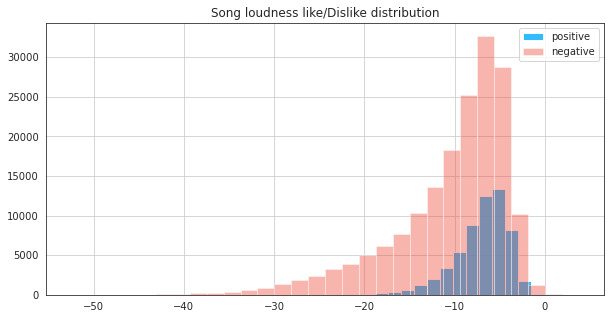

In [24]:
like_loudness = df[df["popularity"] >= 55]["loudness"]
unlike_loudness = df[df["popularity"] < 55 ]["loudness"]
red_blue= ["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
fig =plt.figure(figsize =(10,5))
plt.title("Song loudness like/Dislike distribution")
like_loudness.hist(alpha=0.9,bins=30,label="positive")
unlike_loudness.hist(alpha=0.4,bins=30,label="negative")
plt.savefig('seabornPandas17.png', dpi=100)
plt.legend(loc= "upper right")

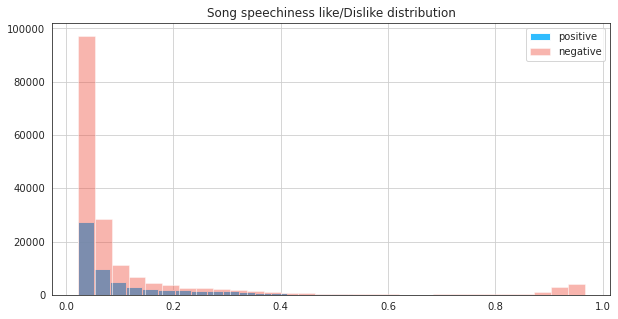

In [25]:
like_speechiness = df[df["popularity"] >= 55]["speechiness"]
unlike_speechiness = df[df["popularity"] < 55 ]["speechiness"]
red_blue= ["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
fig =plt.figure(figsize =(10,5))
plt.title("Song speechiness like/Dislike distribution")
like_speechiness.hist(alpha=0.9,bins=30,label="positive")
unlike_speechiness.hist(alpha=0.4,bins=30,label="negative")
plt.savefig('seabornPandas18.png', dpi=100)
plt.legend(loc= "upper right")


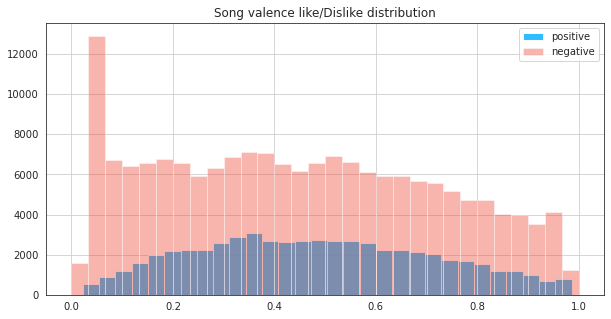

In [26]:
like_valence = df[df["popularity"] >= 55]["valence"]
unlike_valence = df[df["popularity"] < 55 ]["valence"]
red_blue= ["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
fig =plt.figure(figsize =(10,5))
plt.title("Song valence like/Dislike distribution")
like_valence.hist(alpha=0.9,bins=30,label="positive")
unlike_valence.hist(alpha=0.4,bins=30,label="negative")
plt.savefig('seabornPandas19.png', dpi=100)
plt.legend(loc= "upper right")

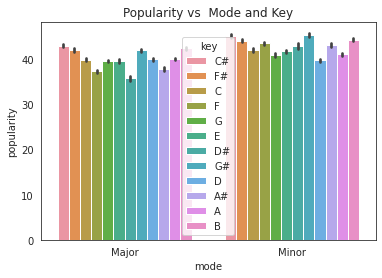

In [27]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = df)
plt.title('Popularity vs  Mode and Key')
plt.savefig("barplot_mode_key.png")
plt.show()

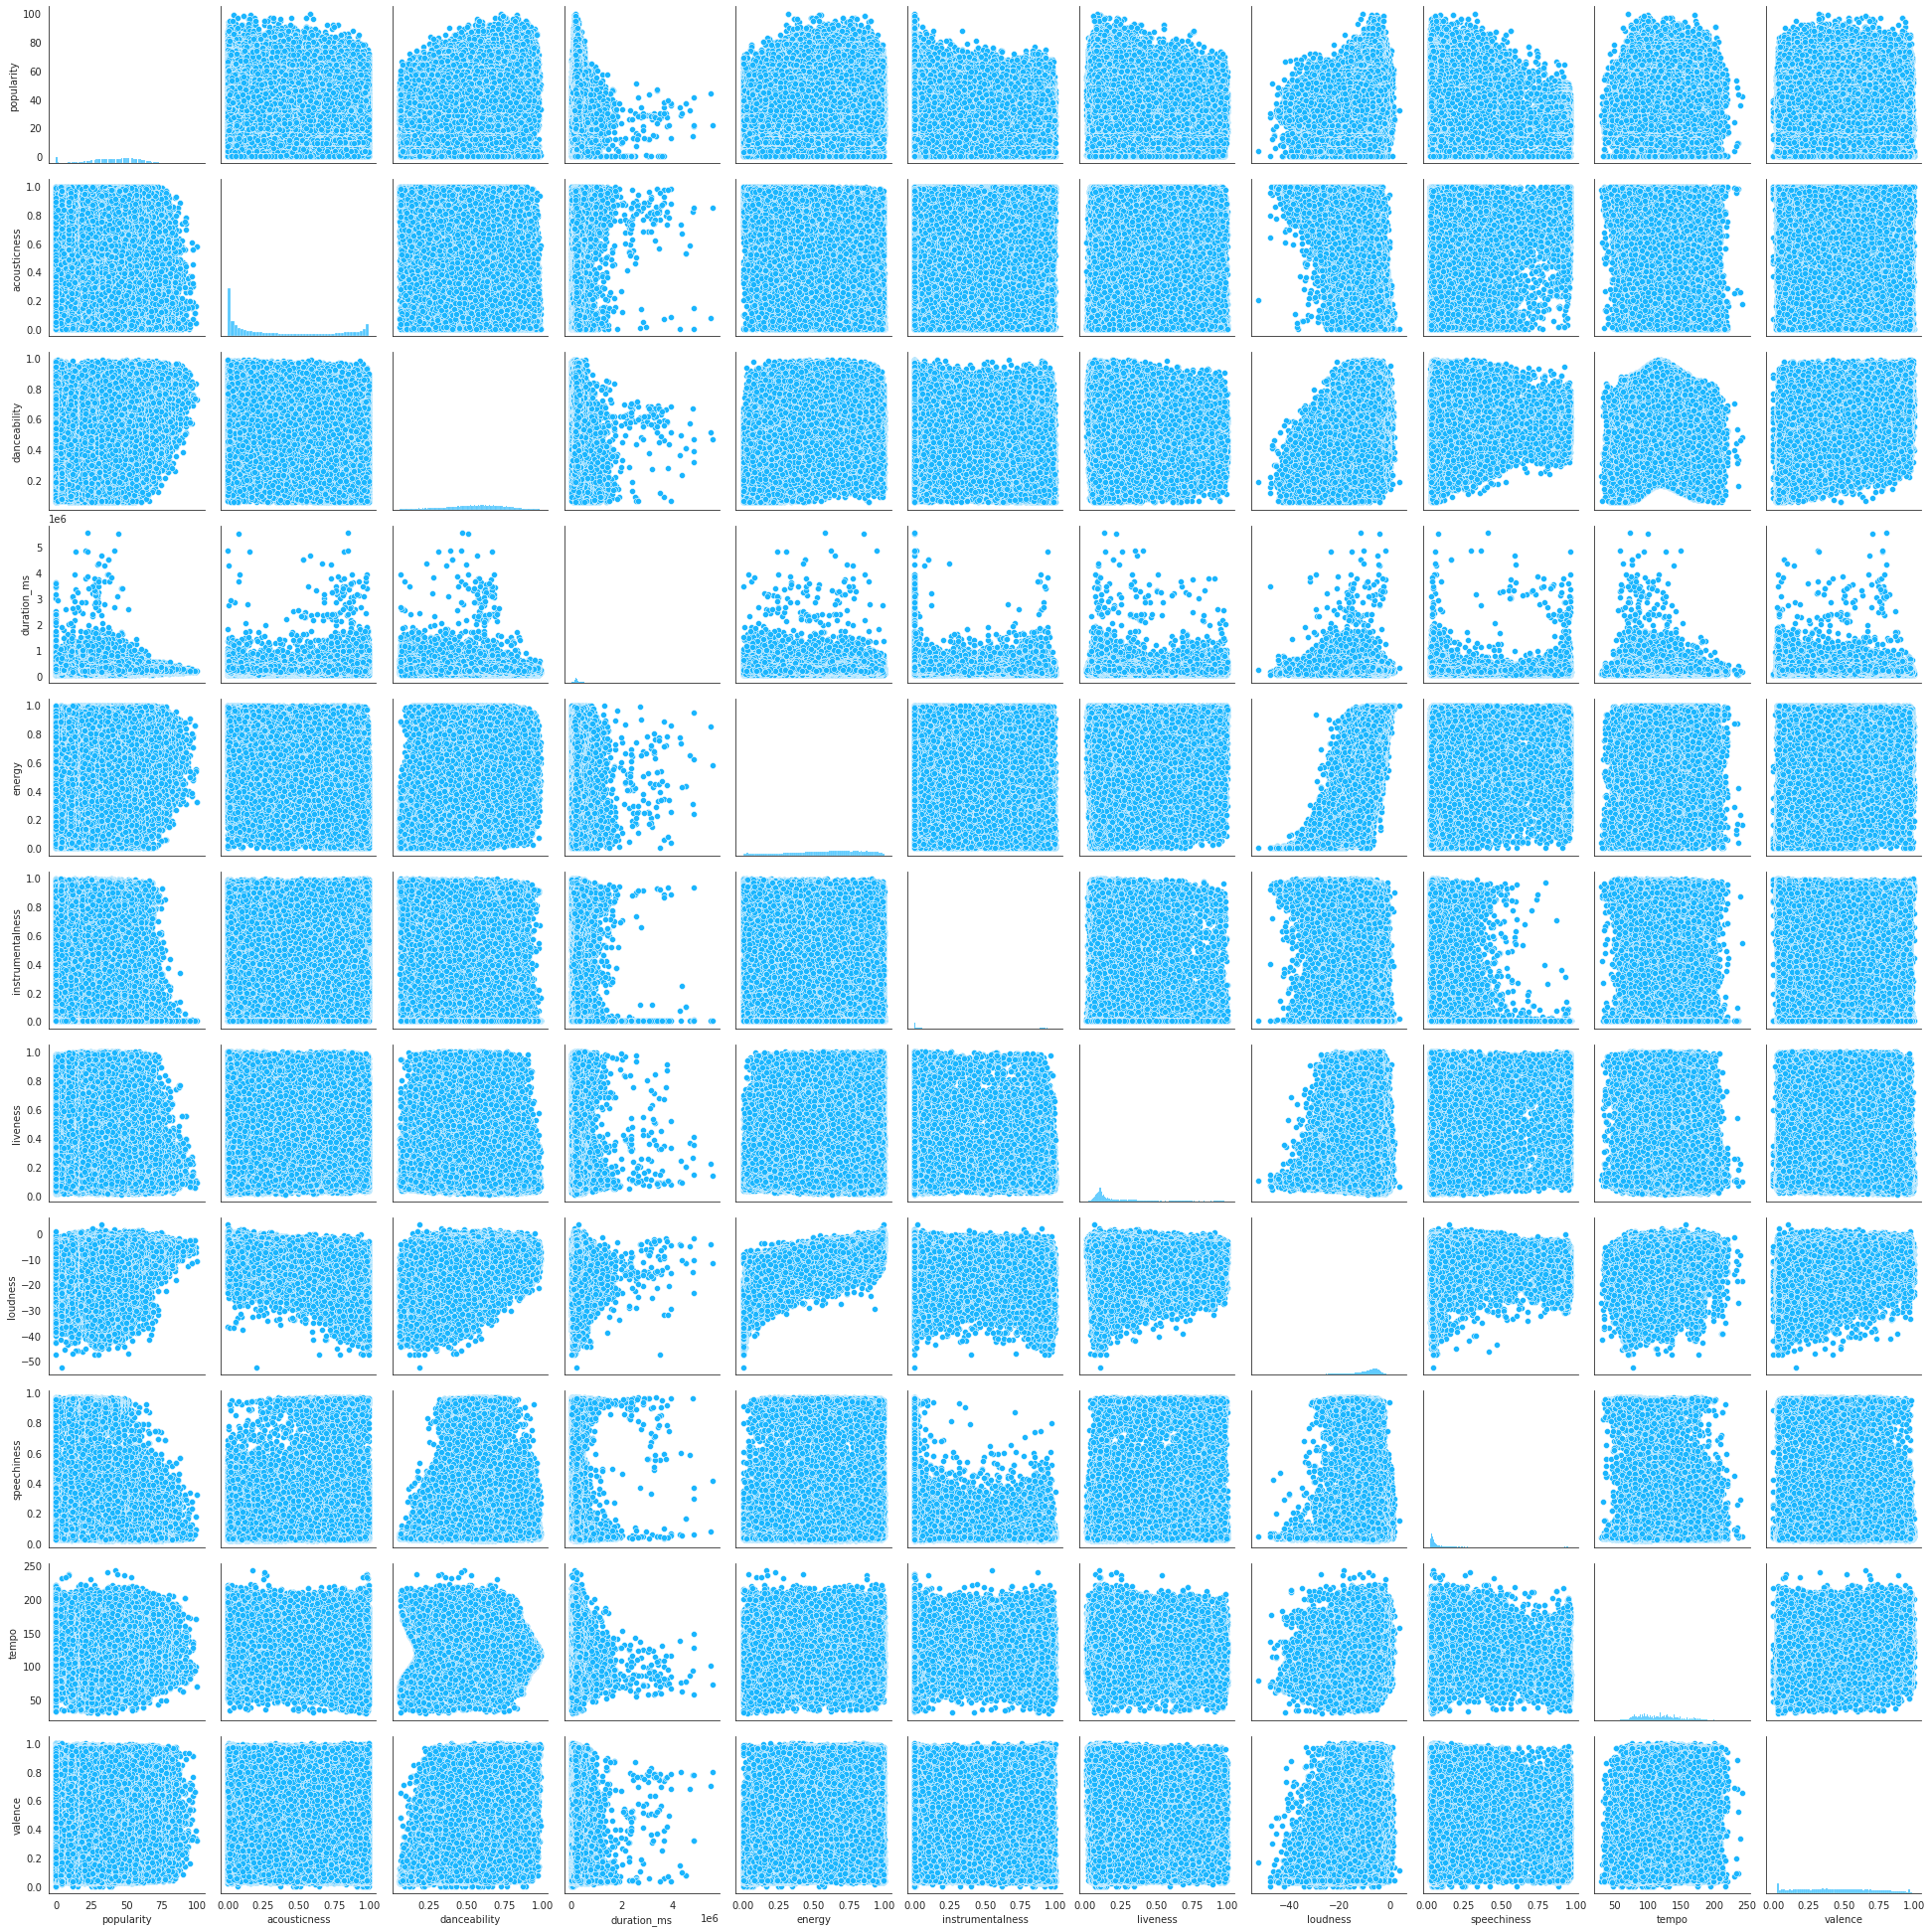

In [28]:
sns.pairplot(df)
plt.savefig("pairplot.png")

# Feature Engineering and Encoding Unsupervised Learning

### eliminating outliers with IQR method

In [5]:
Q1 = df.tempo.quantile(0.25)
Q3 = df.tempo.quantile(0.75)
IQR = Q3 - Q1

In [6]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(23.816500000000005, 208.19650000000001)

In [7]:
df_new = df[(df.tempo>23.816500000000005)&(df.tempo<208.19650000000001)]

In [8]:
Q1 = df_new.acousticness.quantile(0.25)
Q3 = df_new.acousticness.quantile(0.75)
IQR = Q3 - Q1

In [9]:
df_new1 = df_new[(df_new.acousticness>-0.9892500000000001)&(df_new.instrumentalness<1.74875)]

In [153]:
df_new1.shape

(232557, 18)

In [154]:
df = df_new1

### Scaling using min_max scaler

In [155]:
scaler = MinMaxScaler()


scaler.fit(df[['tempo']])
df['tempo'] = scaler.transform(df[['tempo']])
scaler.fit(df[['popularity']])
df['popularity'] = scaler.transform(df[['popularity']])
scaler.fit(df[['duration_ms']])
df['duration_ms'] = scaler.transform(df[["duration_ms"]])
scaler.fit(df[['loudness']])
df['loudness'] = scaler.transform(df[["loudness"]])
scaler.fit(df[['acousticness']])
df['acousticness'] = scaler.transform(df[["acousticness"]])
scaler.fit(df[['danceability']])
df['danceability'] = scaler.transform(df[["danceability"]])
scaler.fit(df[['energy']])
df['energy'] = scaler.transform(df[["energy"]])
scaler.fit(df[['instrumentalness']])
df['instrumentalness'] = scaler.transform(df[["instrumentalness"]])
scaler.fit(df[['liveness']])
df['liveness'] = scaler.transform(df[["liveness"]])
scaler.fit(df[['speechiness']])
df['speechiness'] = scaler.transform(df[["speechiness"]])
scaler.fit(df[['valence']])
df['valence'] = scaler.transform(df[["valence"]])


In [242]:
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV        0.00      0.613454      0.356292   
1  0BjC1NfoEOOusryehmNudP        0.01      0.246988      0.571934   
2  0CoSDzoNIKCRs124s9uTVy        0.03      0.955823      0.650252   
3  0Gc6TVm52BwZD07Ki6tIvf        0.00      0.705823      0.196438   
4  0IuslXpMROHdEPvSl1fTQK        0.04      0.953815      0.294067   

   duration_ms    energy  instrumentalness key  liveness  loudness   mode  \
0     0.015167  0.910909          0.000000  C#  0.339614  0.900856  Major   
1     0.022029  0.737732          0.000000  F#  0.142710  0.834469  Minor   
2     0.027969  0.131113          0.000000   C  0.094241  0.686429  Minor   
3     0.024747  0.326313          0.000000  C#  0.089697  0.716695  Major   
4     0.012142  0.225209          0.123123   F  0.194208  0.557054  Major   

   speechiness     tempo time_signature  valence  
0     0.032070  0.768434            4/4    0.814  
1     0.068374  0.808007            4/4    0.816  
2     0.014818  0.388797            5/4    0.368  
3     0.018311  0.795377            4/4    0.227  
4     0.024767  0.619952            4/4    0.390

# Unsupervised Learning

## K-Means Cluster Analysis

In [156]:
from sklearn.cluster import KMeans

In [157]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['popularity','energy']])
y_predicted

array([1, 1, 2, ..., 0, 3, 0], dtype=int32)

In [158]:
df['cluster1'] = y_predicted

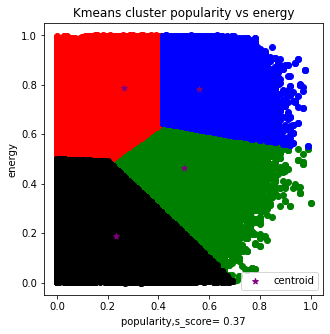

In [159]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
df4 = df[df.cluster1==3]
fig = plt.figure(figsize=(5,5))
plt.scatter(df1.popularity,df1["energy"],color='green')
plt.scatter(df2.popularity,df2["energy"],color='red')
plt.scatter(df3.popularity,df3["energy"],color='black')
plt.scatter(df4.popularity,df4["energy"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('popularity,s_score= 0.37')
plt.ylabel("energy")
plt.title("Kmeans cluster popularity vs energy")
plt.legend()
plt.savefig("k-energy.png")

In [246]:
silhouette_score(df[['popularity','energy']],km.labels_)

0.3708229130886179

In [160]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['popularity','acousticness']])
y_predicted

array([1, 0, 1, ..., 1, 3, 0], dtype=int32)

/tmp/ipykernel_82939/4083506564.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("k_acoustic.png")
/home/vaisakhroot/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


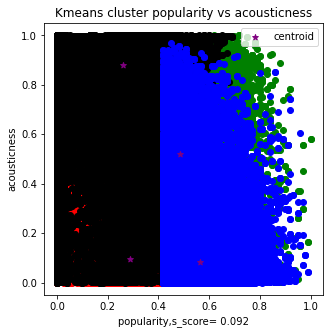

In [162]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
df4 = df[df.cluster1==3]
fig = plt.figure(figsize=(5,5))
plt.scatter(df1.popularity,df1["acousticness"],color='green')
plt.scatter(df2.popularity,df2["acousticness"],color='red')
plt.scatter(df3.popularity,df3["acousticness"],color='black')
plt.scatter(df4.popularity,df4["acousticness"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('popularity,s_score= 0.092')
plt.ylabel("acousticness")
plt.title("Kmeans cluster popularity vs acousticness")
plt.legend()
plt.savefig("k_acoustic.png")

In [267]:
silhouette_score(df[['popularity','acousticness']],km.labels_)

0.09202333021515041

In [163]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['popularity','danceability']])
y_predicted

array([1, 0, 0, ..., 3, 2, 0], dtype=int32)

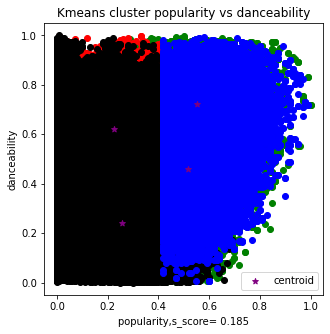

In [164]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
df4 = df[df.cluster1==3]
fig = plt.figure(figsize=(5,5))
plt.scatter(df1.popularity,df1["danceability"],color='green')
plt.scatter(df2.popularity,df2["danceability"],color='red')
plt.scatter(df3.popularity,df3["danceability"],color='black')
plt.scatter(df4.popularity,df4["danceability"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('popularity,s_score= 0.185')
plt.ylabel("danceability")
plt.title("Kmeans cluster popularity vs danceability")
plt.legend()
plt.savefig('k_dance.png')

In [266]:
silhouette_score(df[['popularity','danceability']],km.labels_)

0.18576916838435797

In [165]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['popularity','duration_ms']])
y_predicted

array([3, 3, 3, ..., 0, 0, 1], dtype=int32)

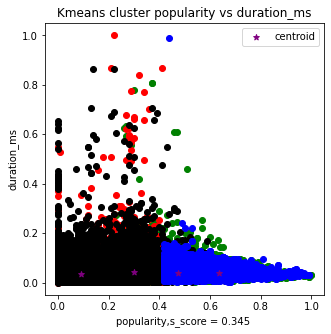

In [166]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
df4 = df[df.cluster1==3]
fig = plt.figure(figsize=(5,5))
plt.scatter(df1.popularity,df1["duration_ms"],color='green')
plt.scatter(df2.popularity,df2["duration_ms"],color='red')
plt.scatter(df3.popularity,df3["duration_ms"],color='black')
plt.scatter(df4.popularity,df4["duration_ms"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('popularity,s_score = 0.345 ')
plt.ylabel("duration_ms")
plt.title("Kmeans cluster popularity vs duration_ms")
plt.legend()
plt.savefig('k_duration.png')

In [265]:
silhouette_score(df[['popularity','duration_ms']],km.labels_)

0.34563658145109794

In [167]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['popularity','instrumentalness']])
y_predicted

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

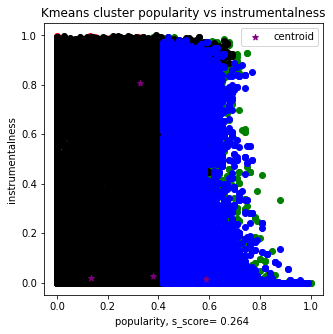

In [168]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
df4 = df[df.cluster1==3]
fig = plt.figure(figsize=(5,5))
plt.scatter(df1.popularity,df1["instrumentalness"],color='green')
plt.scatter(df2.popularity,df2["instrumentalness"],color='red')
plt.scatter(df3.popularity,df3["instrumentalness"],color='black')
plt.scatter(df4.popularity,df4["instrumentalness"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('popularity, s_score= 0.264 ')
plt.ylabel("instrumentalness")
plt.title("Kmeans cluster popularity vs instrumentalness")
plt.legend()
plt.savefig('k_instrument.png')

In [268]:
silhouette_score(df[['popularity','instrumentalness']],km.labels_)

0.2641244616936213

In [169]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['popularity','liveness']])
y_predicted


array([3, 3, 3, ..., 0, 2, 3], dtype=int32)

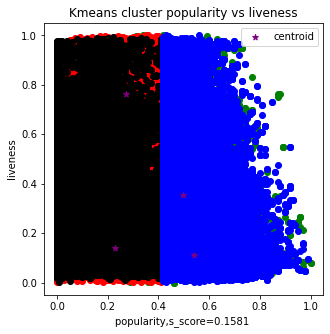

In [170]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
df4 = df[df.cluster1==3]
fig = plt.figure(figsize=(5,5))
plt.scatter(df1.popularity,df1["liveness"],color='green')
plt.scatter(df2.popularity,df2["liveness"],color='red')
plt.scatter(df3.popularity,df3["liveness"],color='black')
plt.scatter(df4.popularity,df4["liveness"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('popularity,s_score=0.1581 ')
plt.ylabel("liveness")
plt.title("Kmeans cluster popularity vs liveness")
plt.legend()
plt.savefig('k_liveness')

In [269]:
silhouette_score(df[['popularity','liveness']],km.labels_)

0.1581465475412397

In [171]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['popularity','speechiness']])
y_predicted

array([3, 3, 3, ..., 2, 0, 0], dtype=int32)

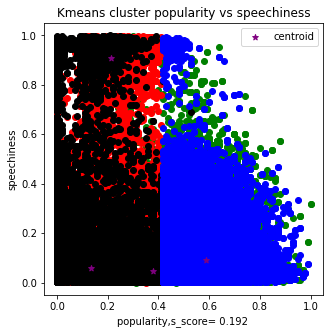

In [172]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
df4 = df[df.cluster1==3]
fig = plt.figure(figsize=(5,5))
plt.scatter(df1.popularity,df1["speechiness"],color='green')
plt.scatter(df2.popularity,df2["speechiness"],color='red')
plt.scatter(df3.popularity,df3["speechiness"],color='black')
plt.scatter(df4.popularity,df4["speechiness"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('popularity,s_score= 0.192 ')
plt.ylabel("speechiness")
plt.title("Kmeans cluster popularity vs speechiness")
plt.legend()
plt.savefig('k_speech.png')

In [270]:
silhouette_score(df[['popularity','speechiness']],km.labels_)

0.19221446238410483

In [173]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['popularity','tempo']])
y_predicted

array([3, 3, 2, ..., 0, 0, 2], dtype=int32)

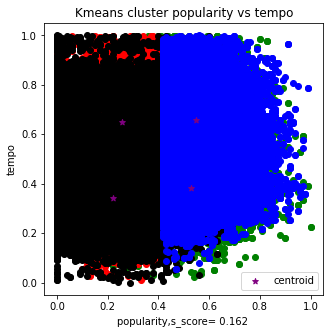

In [174]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
df4 = df[df.cluster1==3]
fig = plt.figure(figsize=(5,5))
plt.scatter(df1.popularity,df1["tempo"],color='green')
plt.scatter(df2.popularity,df2["tempo"],color='red')
plt.scatter(df3.popularity,df3["tempo"],color='black')
plt.scatter(df4.popularity,df4["tempo"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('popularity,s_score= 0.162 ')
plt.ylabel("tempo")
plt.title("Kmeans cluster popularity vs tempo")
plt.legend()
plt.savefig('k_tempo.png')

In [276]:
silhouette_score(df[['popularity','tempo']],km.labels_)

0.16298036349814105

In [261]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['popularity','valence']])
y_predicted

array([2, 2, 3, ..., 1, 0, 0], dtype=int32)

/tmp/ipykernel_82939/3823228590.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("k_valence")
/home/vaisakhroot/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


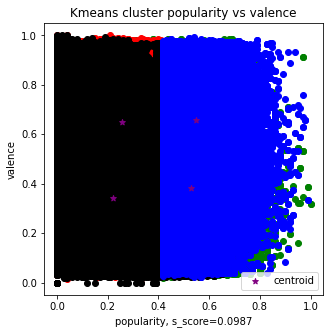

In [175]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
df4 = df[df.cluster1==3]
fig = plt.figure(figsize=(5,5))
plt.scatter(df1.popularity,df1["valence"],color='green')
plt.scatter(df2.popularity,df2["valence"],color='red')
plt.scatter(df3.popularity,df3["valence"],color='black')
plt.scatter(df4.popularity,df4["valence"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('popularity, s_score=0.0987')
plt.ylabel("valence")
plt.title("Kmeans cluster popularity vs valence")
plt.legend()
plt.savefig("k_valence")

In [277]:
silhouette_score(df[['popularity','valence']],km.labels_)

0.09874830280711894

In [176]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['popularity','loudness']])
y_predicted

array([2, 2, 2, ..., 1, 3, 3], dtype=int32)

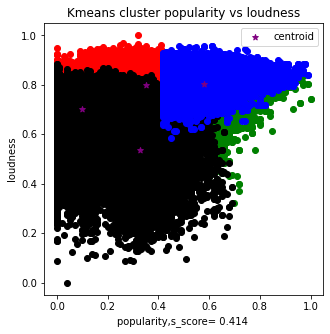

In [177]:
df1 = df[df.cluster1==0]
df2 = df[df.cluster1==1]
df3 = df[df.cluster1==2]
df4 = df[df.cluster1==3]
fig = plt.figure(figsize=(5,5))
plt.scatter(df1.popularity,df1["loudness"],color='green')
plt.scatter(df2.popularity,df2["loudness"],color='red')
plt.scatter(df3.popularity,df3["loudness"],color='black')
plt.scatter(df4.popularity,df4["loudness"],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('popularity,s_score= 0.414 ')
plt.ylabel("loudness")
plt.title("Kmeans cluster popularity vs loudness")
plt.legend()
plt.savefig('k_loudness')

In [278]:
silhouette_score(df[['popularity','loudness']],km.labels_)

0.4144591119961381

## Hierarchial Clustering- Agglomerative

In [63]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [13]:
sliced_df = df.iloc[0:10000,:]

In [14]:
sliced_df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV        0.00      0.613454      0.356292   
1  0BjC1NfoEOOusryehmNudP        0.01      0.246988      0.571934   
2  0CoSDzoNIKCRs124s9uTVy        0.03      0.955823      0.650252   
3  0Gc6TVm52BwZD07Ki6tIvf        0.00      0.705823      0.196438   
4  0IuslXpMROHdEPvSl1fTQK        0.04      0.953815      0.294067   

   duration_ms    energy  instrumentalness key  liveness  loudness   mode  \
0     0.015167  0.910909          0.000000  C#  0.339614  0.900856  Major   
1     0.022029  0.737732          0.000000  F#  0.142710  0.834469  Minor   
2     0.027969  0.131113          0.000000   C  0.094241  0.686429  Minor   
3     0.024747  0.326313          0.000000  C#  0.089697  0.716695  Major   
4     0.012142  0.225209          0.123123   F  0.194208  0.557054  Major   

   speechiness     tempo time_signature  valence  
0     0.032070  0.768434            4/4    0.814  
1     0.068374  0.808007            4/4    0.816  
2     0.014818  0.388797            5/4    0.368  
3     0.018311  0.795377            4/4    0.227  
4     0.024767  0.619952            4/4    0.390

In [70]:
sliced_df.shape

(20000, 20)

In [15]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [179]:
X = sliced_df.iloc[:, [4, 5]].values

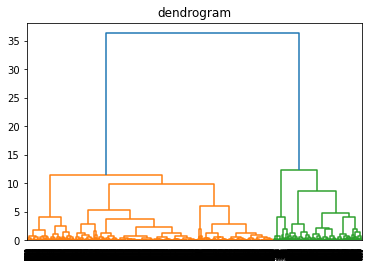

In [38]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("dendrogram")
plt.savefig("dendrogram1.png")


In [180]:

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [27]:
silhouette_score(X,labels)

0.6114467228048698

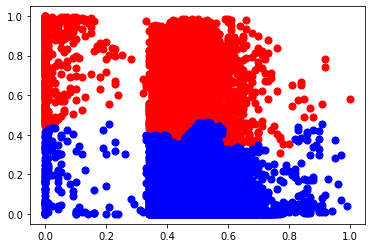

In [181]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.savefig('a_acoust.png')
plt.show()

In [187]:
X = sliced_df.loc[:, ["popularity", "danceability"]].values

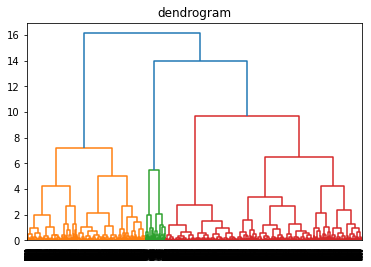

In [29]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("dendrogram")
plt.savefig("dendrogram.png")


In [188]:

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

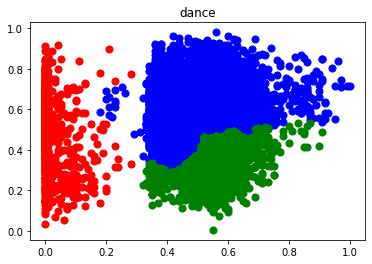

In [189]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.title("dance")
plt.savefig("a_dance.png")
plt.show()

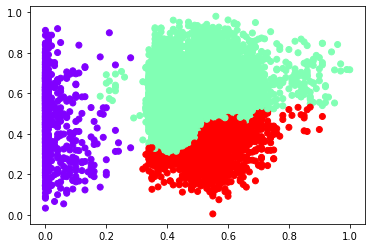

In [92]:
plt.scatter(x=X[:,0], y=X[:,1], c= labels, cmap='rainbow' )

In [93]:
silhouette_score(X,labels)

0.34844754103374526

In [190]:
X = sliced_df.loc[:, ["popularity", "duration_ms"]].values

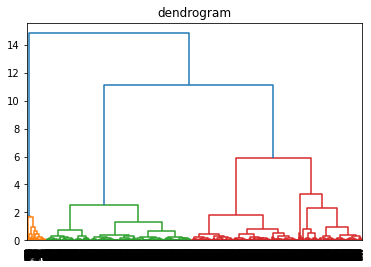

In [40]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("dendrogram")
plt.savefig("dendrogram2.png")


In [191]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

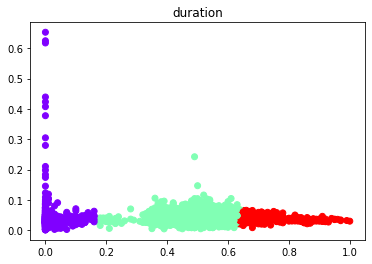

In [192]:
plt.scatter(x=X[:,0], y=X[:,1], c= labels, cmap='rainbow' )
plt.title('duration')
plt.savefig("a_duration.png")

In [43]:
silhouette_score(X,labels)

0.55276941959023

In [193]:
X = sliced_df.loc[:, ["popularity", "energy"]].values


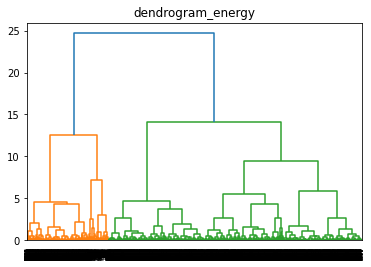

In [45]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("dendrogram_energy")
plt.savefig("dendrogram3.png")

In [194]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

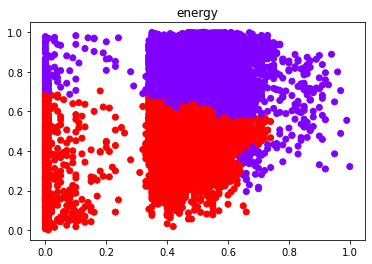

In [195]:
plt.scatter(x=X[:,0], y=X[:,1], c= labels, cmap='rainbow' )
plt.title("energy")
plt.savefig("a_energy.png")

In [97]:
silhouette_score(X,labels)

0.4518965371314158

In [196]:
X = sliced_df.loc[:, ["popularity", "instrumentalness"]].values


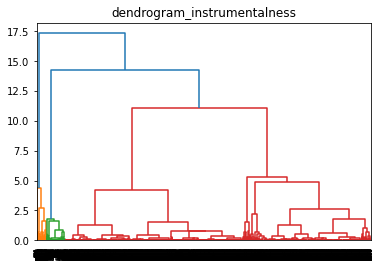

In [54]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("dendrogram_instrumentalness")
plt.savefig("dendrogram4.png")

In [197]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

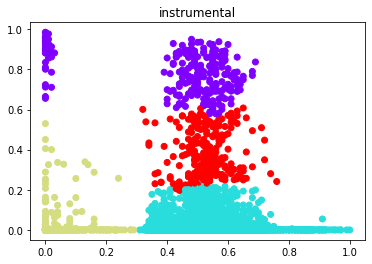

In [200]:
plt.scatter(x=X[:,0], y=X[:,1], c= labels, cmap='rainbow' )
plt.title('instrumental')
plt.savefig('a_instrument.png')

In [101]:
silhouette_score(X,labels)

0.6790647121112966

In [202]:
X = sliced_df.loc[:, ["popularity", "liveness"]].values


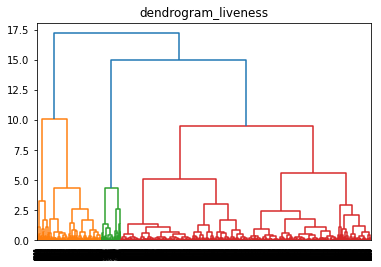

In [56]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("dendrogram_liveness")
plt.savefig("dendrogram5.png")

In [203]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

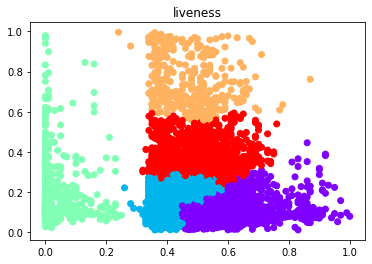

In [204]:
plt.scatter(x=X[:,0], y=X[:,1], c= labels, cmap='rainbow' )
plt.title("liveness")
plt.savefig('a_live.png')

In [120]:
silhouette_score(X,labels)

0.3915302178686351

In [205]:
X = sliced_df.loc[:, ["popularity", "loudness"]].values

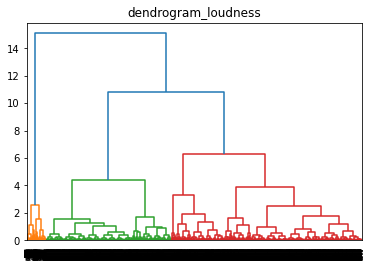

In [62]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("dendrogram_loudness")
plt.savefig("dendrogram6.png")

In [206]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

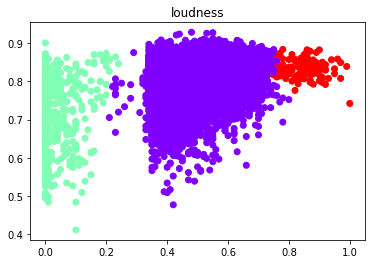

In [207]:
plt.scatter(x=X[:,0], y=X[:,1], c= labels, cmap='rainbow' )
plt.title('loudness')
plt.savefig('a_loud.png')

In [69]:
silhouette_score(X,labels)

0.5888679149217163

In [208]:
X = sliced_df.loc[:, ["popularity", "speechiness"]].values

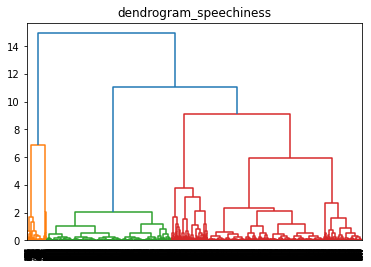

In [110]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("dendrogram_speechiness")
plt.savefig("dendrogram7.png")

In [209]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

In [114]:
silhouette_score(X,labels)

0.6775200790068722

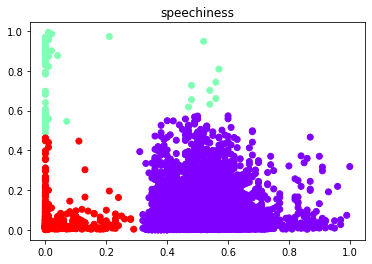

In [210]:
plt.scatter(x=X[:,0], y=X[:,1], c= labels, cmap='rainbow' )
plt.title('speechiness')
plt.savefig('a_speech.png')

In [211]:
X = sliced_df.loc[:, ["popularity", "tempo"]].values

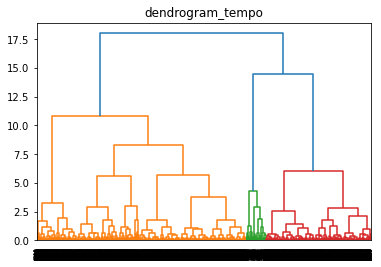

In [122]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("dendrogram_tempo")
plt.savefig("dendrogram8.png")

In [212]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

In [133]:
silhouette_score(X,labels)

0.377266131089059

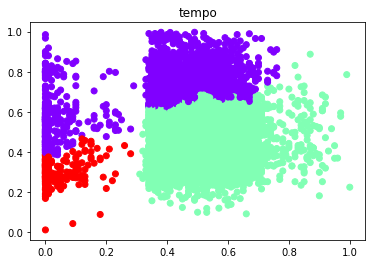

In [213]:
plt.scatter(x=X[:,0], y=X[:,1], c= labels, cmap='rainbow' )
plt.title("tempo")
plt.savefig("a_tempo.png")

In [214]:
X = sliced_df.loc[:, ["popularity", "valence"]].values

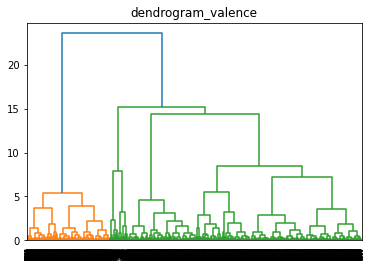

In [136]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("dendrogram_valence")
plt.savefig("dendrogram9.png")

In [215]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

In [150]:
silhouette_score(X,labels)

0.26286922602162294

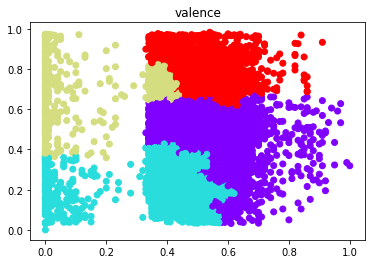

In [216]:
plt.scatter(x=X[:,0], y=X[:,1], c= labels, cmap='rainbow' )
plt.title("valence")
plt.savefig("a_valence.png")

## Feature encoding and engineering for suprevised learning

-In the dataframe features like key, mode and time signature are in object type which should be converted to int type inorder to predict the effect of the above said features in determining the popularity of spotify palylist.
1. key consists of 8 major chords and 4 minor chords, major chords = C,D,E,F,G,A,B,C and minor chords = A#,C#,F#,G#,D#, ignoring the major minor difference, keys are ecoded from A=0, A#=1 so forth till B=12.
2. In mode there are only two categories major and minor, major will be assigned 1 and minor will be assigned 0
3.Popularity is defined as a binary variable. The songs which has a popularity score greater than or equal to 55 will be assigned 1 and that has less than 55 will be assigned 0. the criteria was selected because the popularity index of  55 is the border of  top 25% popular song . this criteria has been used to plot the likeness and unlikeness histogram as well.


In [218]:
df.loc[df['popularity'] < 55, 'popularity'] = 0 
df.loc[df['popularity'] >= 55, 'popularity'] = 1


In [219]:
keys = df['key'].unique()
for i in range(len(keys)):
    df.loc[df['key'] == keys[i], 'key'] = i
df.head(5)

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           0         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           0         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           0         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000   0    0.3460    -1.828  Major   
1       137373   0.737             0.000   1    0.1510    -5.559  Minor   
2       170267   0.131             0.000   2    0.1030   -13.879  Minor   
3       152427   0.326             0.000   0    0.0985   -12.178  Major   
4        82625   0.225             0.123   3    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [220]:
time_signatures = df['time_signature'].unique()
for i in range(len(time_signatures)):
    df.loc[df['time_signature'] == time_signatures[i], 'time_signature'] = i
df.head(5)

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           0         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           0         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           0         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000   0    0.3460    -1.828  Major   
1       137373   0.737             0.000   1    0.1510    -5.559  Minor   
2       170267   0.131             0.000   2    0.1030   -13.879  Minor   
3       152427   0.326             0.000   0    0.0985   -12.178  Major   
4        82625   0.225             0.123   3    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969              0    0.814  
1       0.0868  174.003              0    0.816  
2       0.0362   99.488              1    0.368  
3       0.0395  171.758              0    0.227  
4       0.0456  140.576              0    0.390

# Supervised Learning Methods- Fitting the Model and Predicting

In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import train_test_split

In [222]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "liveness", 
             "speechiness", "tempo",  "valence","loudness"]

In [223]:
training = df.sample(frac = 0.6,random_state = 420)
x = df[features]
y = df[["popularity"]]

In [224]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4)
x_test = df.drop(training.index)[features]

### Supervised Learning  Method- Decision Tree Classifier 

In [225]:
c = DecisionTreeClassifier()

In [226]:
dt = c.fit(x_train,y_train)

In [227]:
y_pred = c.predict(x_test)

In [228]:
accuracy_score(y_test,y_pred)*100

61.4394671822967

### Supervised Learning Method - Logistic Regression 

In [240]:
LR = LogisticRegression()
Logit_model = LR.fit(x_train, y_train)
LR_Predict = LR.predict(x_test)
LR_Accuracy = accuracy_score(y_test, LR_Predict)*100
print("Accuracy: " + str(LR_Accuracy))

/home/vaisakhroot/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 74.83618004082071


In [248]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit( x_train, y_train)

/home/vaisakhroot/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [250]:
logit = sm.Logit(y_train, x_train)

In [251]:
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.495805
         Iterations 7


In [252]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.120      
Dependent Variable: popularity       AIC:              138483.4117
Date:               2022-11-02 09:32 BIC:              138581.8796
No. Observations:   139635           Log-Likelihood:   -69232.    
Df Model:           9                LL-Null:          -78629.    
Df Residuals:       139625           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
acousticness      -0.7176   0.0294 -24.3689 0.0000 -0.7753 -0.6599
danceability       2.4193   0.0405  59.7651 0.0000  2.3400  2.4987
duration_ms       -0.0000   0.0000  -4.2268 0.0000 -0.0000 -0.0000
energy            -0.9313   0.0407 -22.8803 0.0000 -1.0111 -0.8515
instrumentalness  -1.6361   0.0396 -41.3478 0.0000 -1.7137 -1.5586
liveness          -0.9046   0.0437 -20.6775 0.0000 -0.9903 -0.8188
speechiness       -0.5728   0.0525 -10.9160 0.0000 -0.6757 -0.4700
tempo              0.0016   0.0002   7.9596 0.0000  0.0012  0.0020
valence           -1.0987   0.0323 -33.9866 0.0000 -1.1621 -1.0353
loudness           0.1112   0.0024  46.5255 0.0000  0.1065  0.1159
==================================================================

"""

In [230]:
from sklearn import metrics

In [233]:
cm = metrics.confusion_matrix(y_test, LR_Predict )
print(cm)    

[[69665     0]
 [23425     0]]


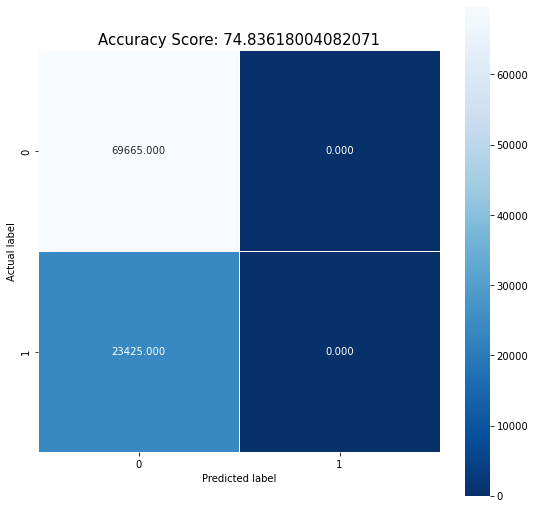

In [236]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,fmt=".3f",linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(LR_Accuracy)
plt.title(all_sample_title,size = 15)
plt.savefig("confusion matrix")

In [237]:
print( metrics.classification_report(y_test,LR_Predict ))

/home/vaisakhroot/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vaisakhroot/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86     69665
           1       0.00      0.00      0.00     23425

    accuracy                           0.75     93090
   macro avg       0.37      0.50      0.43     93090
weighted avg       0.56      0.75      0.64     93090



/home/vaisakhroot/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [241]:
Logit_model.summary2()

AttributeError: 'LogisticRegression' object has no attribute 'summary2'